In [1]:
import numpy as np
import matplotlib.pyplot as plt

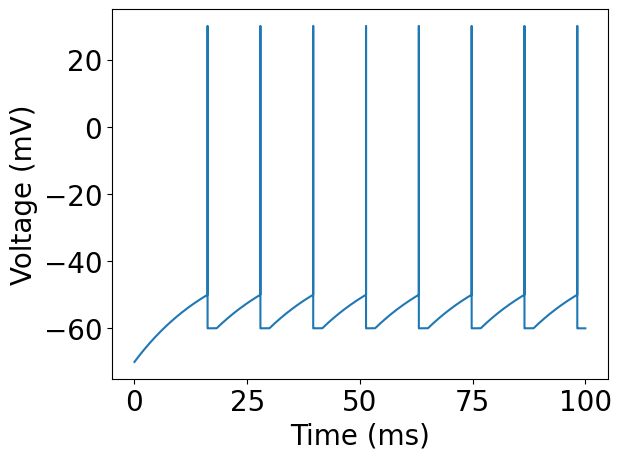

In [2]:
# Define a function 'calc_next_step' to calculate the next voltage step in a neuron model simulation.
def calc_next_step(Vm, I, step_t, remaining_refrac_time):
    # Constants for the neuron model
    Vl = -70  # Leak potential in mV
    Gl = 0.025  # Leak conductance
    C = 0.5  # Membrane capacitance

    # Check if the membrane potential is within the threshold range
    if Vm > -50 and Vm < 0:  # Threshold condition
        Vm = 30  # Spike potential in mV
    elif Vm > 0:
        Vm = -60  # Reset potential in mV
        remaining_refrac_time = remaining_refrac_time * 0 + 2  # Reset refractory time to 2 ms
    elif remaining_refrac_time > 0:
        Vm = -60  # Maintain reset potential during refractory period
        remaining_refrac_time -= step_t  # Decrease the remaining refractory time
    else:
        # Update the membrane potential based on the leak current and input current
        Vm = Vm + step_t * (-Gl * (Vm - Vl) + I) / C
    
    # Reset the refractory time to zero if it goes negative
    if remaining_refrac_time < 0:
        remaining_refrac_time = remaining_refrac_time * 0

    return Vm, remaining_refrac_time

# Simulation parameters
step_t = 0.001  # Time step for the simulation in ms
t = np.arange(0, 100 + step_t, step_t)  # Time array from 0 to 100 ms
Vm_out = np.zeros(np.shape(t)[0])  # Initialize an array to store membrane potentials
I = 0.9  # Constant input current

# Initial state of the neuron
ind = 0
Vm_out[0] = -70  # Initial membrane potential
remaining_refrac_time = 0  # Initial refractory time

# Simulate the neuron dynamics over time
for tt in t[0:-1]:
    # Calculate the next step and update the membrane potential and refractory time
    Vm_out[ind + 1], remaining_refrac_time = calc_next_step(Vm_out[ind], I, step_t, remaining_refrac_time)
    ind += 1

# Plotting the membrane potential over time
plt.plot(t, Vm_out)
plt.xlabel("Time (ms)", fontsize=20)
plt.ylabel("Voltage (mV)", fontsize=20)
plt.tick_params(labelsize=20)
# Uncomment to save the figure
# plt.savefig("lif_1.png", bbox_inches="tight")
plt.show()


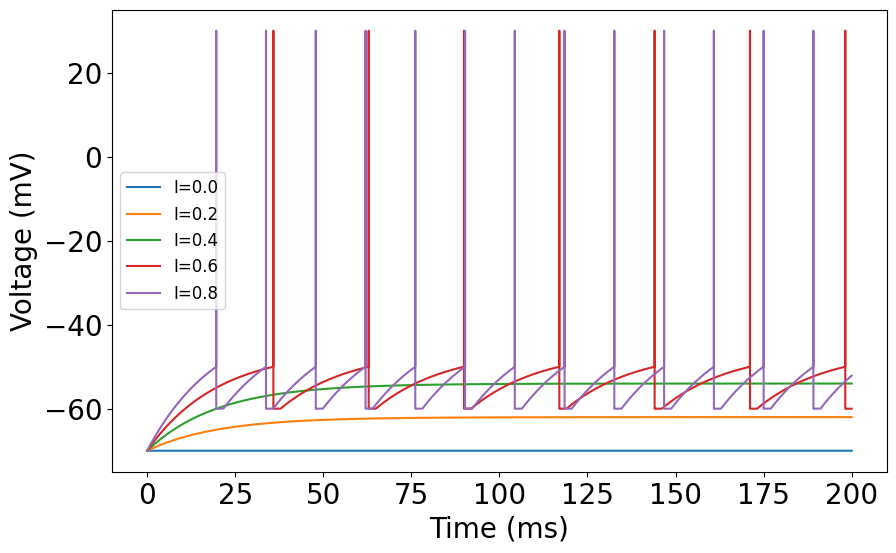

In [3]:
# Setting the time step for the simulation
step_t = 0.001  # Time step in milliseconds

# Creating an array of time points from 0 to 200 ms with increments of step_t
t = np.arange(0, 200 + step_t, step_t)

# Creating an array of different external current values to test, ranging from 0 to 1 with a step of 0.2
I_ext = np.arange(0, 1, 0.2)

# Setting up the figure for plotting with a specified size
plt.figure(figsize=(10, 6))

# Looping over each external current value
for i in range(5):
    # Initializing an array to store the membrane potentials for this simulation
    Vm_out = np.zeros(np.shape(t)[0])

    # Selecting the current external current value for this iteration
    I = I_ext[i]

    # Initializing the simulation
    ind = 0
    Vm_out[0] = -70  # Set initial membrane potential
    remaining_refrac_time = 0  # Set initial refractory time

    # Simulating the neuron dynamics over the time array
    for tt in t[0:-1]:
        # Update membrane potential and refractory time for the next time step
        Vm_out[ind + 1], remaining_refrac_time = calc_next_step(Vm_out[ind], I, step_t, remaining_refrac_time)
        ind += 1

    # Plotting the membrane potential over time for this external current
    plt.plot(t, Vm_out, label='I={:.1f}'.format(I))

# Setting the labels and font sizes for the plot
plt.xlabel("Time (ms)", fontsize=20)
plt.ylabel("Voltage (mV)", fontsize=20)
plt.tick_params(labelsize=20)

# Adding a legend with a specified font size
plt.legend(fontsize=12)

# Uncomment to save the figure to a file
# plt.savefig("lif_2.png", bbox_inches="tight")

# Displaying the plot
plt.show()

In [4]:
def calc_next_step_noise(Vm, I, step_t, remaining_refrac_time, sigma):
    # Constants for the neuron model
    Vl = -70  # Leak potential in mV
    Gl = 0.025  # Leak conductance
    C = 0.5  # Membrane capacitance

    # Generating a random number from a normal distribution for noise
    wn = np.random.normal()

    # Check if the membrane potential is within the threshold range
    if Vm > -50 and Vm < 0:  # Threshold condition
        Vm = 30  # Spike potential in mV
    elif Vm > 0:
        Vm = -60  # Reset potential in mV
        remaining_refrac_time = remaining_refrac_time * 0 + 2  # Reset refractory time to 2 ms
    elif remaining_refrac_time > 0:
        Vm = -60  # Maintain reset potential during refractory period
        remaining_refrac_time -= step_t  # Decrease the remaining refractory time
    else:
        # Update the membrane potential based on the leak current, input current, and noise
        Vm = Vm + step_t * (-Gl * (Vm - Vl) + I) / C + sigma * np.sqrt(step_t) * wn

    # Reset the refractory time to zero if it goes negative
    if remaining_refrac_time < 0:
        remaining_refrac_time = remaining_refrac_time * 0

    return Vm, remaining_refrac_time

In the presence of noise, neurons that would not reach the threshold potential with the input current may also trigger an action potential.

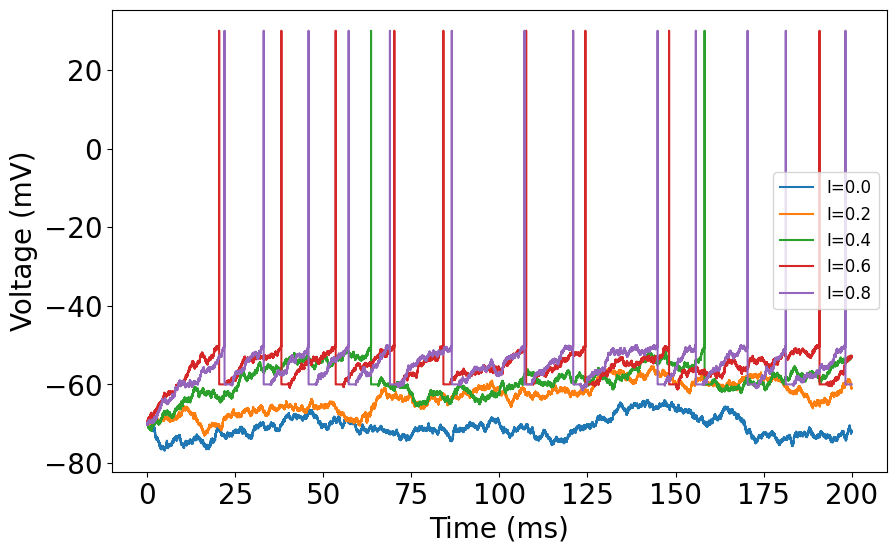

In [5]:
# Set the time step for the simulation
step_t = 0.001  # Time step in milliseconds

# Create an array of time points from 0 to 200 ms with increments of step_t
t = np.arange(0, 200 + step_t, step_t)

# Create an array of different external current values to test, ranging from 0 to 1 with a step of 0.2
I_ext = np.arange(0, 1, 0.2)

# Setting up the figure for plotting with a specified size
plt.figure(figsize=(10, 6))

# Loop over each external current value
for i in range(5):
    # Initialize an array to store the membrane potentials for this simulation
    Vm_out = np.zeros(np.shape(t)[0])

    # Select the current external current value for this iteration
    I = I_ext[i]

    # Initialize the simulation
    ind = 0
    Vm_out[0] = -70  # Set initial membrane potential
    remaining_refrac_time = 0  # Set initial refractory time

    # Simulate the neuron dynamics over the time array with noise
    for tt in t[0:-1]:
        # Update membrane potential and refractory time for the next time step, including noise
        Vm_out[ind + 1], remaining_refrac_time = calc_next_step_noise(Vm_out[ind], I, step_t, remaining_refrac_time, 1)
        ind += 1

    # Plot the membrane potential over time for this external current
    plt.plot(t, Vm_out, label='I={:.1f}'.format(I))

# Setting labels and font sizes for the plot
plt.xlabel("Time (ms)", fontsize=20)
plt.ylabel("Voltage (mV)", fontsize=20)
plt.tick_params(labelsize=20)

# Adding a legend with a specified font size
plt.legend(fontsize=12)

# Uncomment to save the figure to a file
# plt.savefig("lif_3.png", bbox_inches="tight")

# Display the plot
plt.show()

In [6]:
def extract_CV_from_voltage(voltage, step_t):
    # Initialize an array to store the coefficient of variation for each voltage trace
    spike_cv = np.zeros(np.shape(voltage)[0]) 

    # Loop over each voltage trace
    for ii in np.arange(0, np.shape(voltage)[0], 1):
        # Identify the indices where spikes occur (voltage equals 30 mV)
        idx_spike = np.transpose(np.argwhere(voltage[ii, :] == 30))

        # Calculate the differences between successive spike indices (interspike intervals)
        idx_spike_diff = np.diff(idx_spike) * step_t

        # Check if there are any interspike intervals
        if len(idx_spike_diff[0]):
            # Calculate the mean interspike interval (ISI)
            mean_isi = np.mean(idx_spike_diff)
            # Calculate the standard deviation of the interspike intervals
            std_isi = np.std(idx_spike_diff)
            # Calculate the coefficient of variation (CV) of interspike intervals
            spike_cv[ii] = std_isi / mean_isi
        else:
            # If there are no interspike intervals, set the CV to 1
            spike_cv[ii] = 1

    return spike_cv


In [8]:
# Define stimulus levels and simulation parameters
I_stim = np.linspace(0, 1, 200)  # External stimulus levels, from 0 to 1, in 200 steps
step_t = 0.001  # Time step in milliseconds
t = np.arange(0, 500 + step_t, step_t)  # Time array from 0 to 500 ms

# Initialize lists to store firing rates
firing_rate_list = []  # Firing rates without noise
firing_rate_noise_list = []  # Firing rates with noise

# Simulation without noise
for i in range(200):
    Vm_out = np.zeros(np.shape(t)[0])  # Initialize membrane potential array
    I = I_stim[i]  # Current stimulus level

    ind = 0
    Vm_out[0] = -70  # Set initial membrane potential
    remaining_refrac_time = 0  # Set initial refractory time
    spike_num = 0  # Initialize spike count

    # Run simulation
    for tt in t[0:-1]:
        Vm_out[ind + 1], remaining_refrac_time = calc_next_step(Vm_out[ind], I, step_t, remaining_refrac_time)
        if Vm_out[ind + 1] == 30:
            spike_num += 1  # Count spike when membrane potential reaches 30 mV
        ind += 1

    firing_rate = spike_num * 1000 / 500  # Calculate firing rate in Hz
    firing_rate_list.append(firing_rate)  # Store firing rate

# Simulation with noise
for i in range(200):
    Vm_out = np.zeros(np.shape(t)[0])  # Initialize membrane potential array
    I = I_stim[i]  # Current stimulus level

    ind = 0
    Vm_out[0] = -70  # Set initial membrane potential
    remaining_refrac_time = 0  # Set initial refractory time
    spike_num = 0  # Initialize spike count

    # Run simulation with noise
    for tt in t[0:-1]:
        Vm_out[ind + 1], remaining_refrac_time = calc_next_step_noise(Vm_out[ind], I, step_t, remaining_refrac_time, 1)
        if Vm_out[ind + 1] == 30:
            spike_num += 1  # Count spike when membrane potential reaches 30 mV
        ind += 1

    firing_rate = spike_num * 1000 / 500  # Calculate firing rate in Hz
    firing_rate_noise_list.append(firing_rate)  # Store firing rate

# The result is two lists containing firing rates for each stimulus level, with and without noise



Near the threshold, large fluctuations are prone to occur. As the voltage increases, the relative error will decrease.

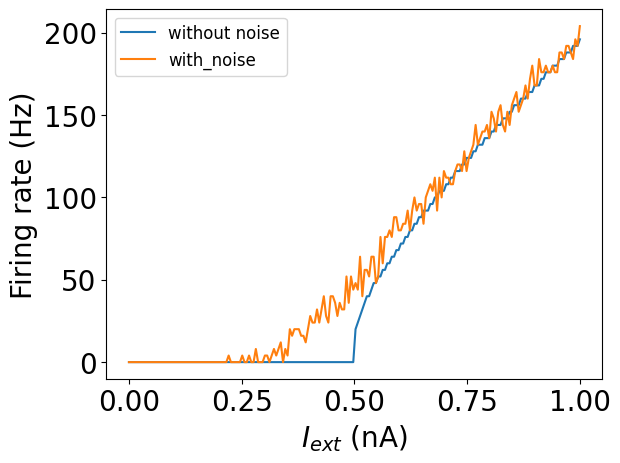

In [9]:
# Plot the firing rates
plt.plot(I_stim, np.array(firing_rate_list) * 2, label='without noise')  # Plot firing rates without noise
plt.plot(I_stim, np.array(firing_rate_noise_list) * 2, label='with_noise')  # Plot firing rates with noise

# Set the labels and font sizes for the axes
plt.xlabel(r"$I_{ext}$ (nA)", fontsize=20)  # Label for the x-axis (external current)
plt.ylabel("Firing rate (Hz)", fontsize=20)  # Label for the y-axis (firing rate)

# Set the size of the tick labels
plt.tick_params(labelsize=20)

# Add a legend with a specified font size
plt.legend(fontsize=12)

# Uncomment the next line to save the figure as an image file
# plt.savefig("lif_4.png", bbox_inches="tight")

# Display the plot
plt.show()


In [10]:
# Define stimulus levels and simulation parameters
I_stim = np.linspace(0, 1, 50)  # External stimulus levels, from 0 to 1, in 50 steps
step_t = 0.001  # Time step in milliseconds
t = np.arange(0, 500 + step_t, step_t)  # Time array from 0 to 500 ms

# Initialize lists to store CV values and firing rates
cv_list = []  # List to store coefficient of variation for each stimulus level
firing_rate_noise_list = []  # List to store firing rates with noise for each stimulus level

# Run simulations for each stimulus level
for i in range(50):
    Vm_out = np.zeros(np.shape(t)[0])  # Initialize membrane potential array
    I = I_stim[i]  # Current stimulus level

    # Initialize simulation parameters
    ind = 0
    Vm_out[0] = -70  # Set initial membrane potential
    remaining_refrac_time = 0  # Set initial refractory time
    spike_num = 0  # Initialize spike count

    # Run simulation with noise
    for tt in t[0:-1]:
        Vm_out[ind + 1], remaining_refrac_time = calc_next_step_noise(Vm_out[ind], I, step_t, remaining_refrac_time, 0.4)
        if Vm_out[ind + 1] == 30:
            spike_num += 1  # Count spike when membrane potential reaches 30 mV
        ind += 1

    # Calculate firing rate in Hz
    firing_rate = spike_num * 1000 / 500
    firing_rate_noise_list.append(firing_rate)  # Store firing rate

    # Calculate and store the coefficient of variation (CV)
    cv_list.append(extract_CV_from_voltage(Vm_out.reshape((1, -1)), step_t))

# The result is two lists: one containing firing rates with noise and another containing CVs for each stimulus level


As the firing rate increases, the stability of the neuron's firing will gradually increase, and the CV (coefficient of variation) will gradually decrease.

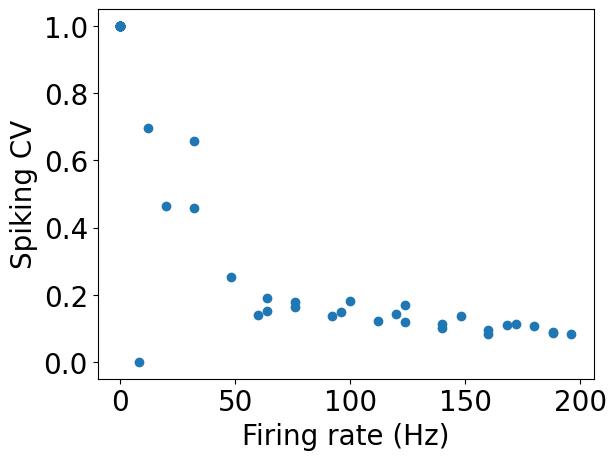

In [11]:
# Plotting the relationship between the firing rate and spiking CV
plt.plot(np.array(firing_rate_noise_list) * 2, cv_list, 'o')  # Scatter plot of firing rate vs. CV

# Setting the labels and font sizes for the axes
plt.xlabel("Firing rate (Hz)", fontsize=20)  # Label for the x-axis
plt.ylabel("Spiking CV", fontsize=20)  # Label for the y-axis

# Setting the size of the tick labels
plt.tick_params(labelsize=20)

# Uncomment the next line to save the figure as an image file
# plt.savefig("lif_6.png", bbox_inches="tight")

# Display the plot
plt.show()